* [slides](https://www.mimuw.edu.pl/~son/datamining/DM/6-rules.pdf)

* [vid](https://www.youtube.com/watch?v=PNF2eUiZAn0)

* C5.0 can construct classifiers expressed as decision trees or as sets of rules
* generates a decision tree
* the tree can be decomposed into a series of rules

In [1]:
'''
if paper type = super then band
	else
	if paper type = uncoated then
	   if ink type = cover then band
	   else
	   if ink type = coated then
	      if viscosity < 40 then band
	      else
	      . . . .
	if paper type = coated then
	   if current density < 37 then noband
	   else
	   . . . .
'''

'\nif paper type = super then band\n\telse\n\tif paper type = uncoated then\n\t   if ink type = cover then band\n\t   else\n\t   if ink type = coated then\n\t      if viscosity < 40 then band\n\t      else\n\t      . . . .\n\tif paper type = coated then\n\t   if current density < 37 then noband\n\t   else\n\t   . . . .\n'

In [2]:
'''
	Rule 1: (cover 17)
	    	ink type = uncoated
	    	blade pressure > 25
		->  class band  [0.947]

	Rule 2: (cover 10)
	    	ink type = uncoated
	    	proof cut > 42.5
	    	proof cut <= 55
	    	ESA Voltage > 0
		->  class band  [0.917]

	Rule 3: (cover 9)
	    	paper type = super
		->  class band  [0.909]

	Rule 4: (cover 9)
	    	paper type = coated
	    	proof cut <= 45
	    	viscosity <= 55
	    	hardener <= 0.8
	    	current density > 37
		->  class band  [0.818]

	Rule 5: (cover 3)
	    	paper type = coated
	    	type on cylinder = no
	    	viscosity <= 55
	    	current density > 37
	    	chrome content > 95
		->  class band  [0.800]

	Rule 6: (cover 2)
	    	paper type = uncoated
	    	ink type = coated
	    	viscosity <= 40
		->  class band  [0.750]

	Rule 7: (cover 1)
	    	ink type = cover
		->  class band  [0.667]

	Rule 8: (cover 17)
	    	ink type = uncoated
	    	blade pressure <= 25
	    	ESA Voltage <= 0
		->  class noband  [0.895]

	Rule 9: (cover 17)
	    	paper type = uncoated
	    	ink type = coated
	    	viscosity > 40
		->  class noband  [0.895]

	Rule 10: (cover 6)
	    	proof cut > 55
	    	blade pressure <= 25
		->  class noband  [0.875]

	Rule 11: (cover 14)
	    	paper type = uncoated
	    	proof cut <= 42.5
	    	blade pressure <= 25
		->  class noband  [0.875]

	Rule 12: (cover 68)
	    	paper type = coated
		->  class noband  [0.757]

	Default class: noband
'''

'\n\tRule 1: (cover 17)\n\t    \tink type = uncoated\n\t    \tblade pressure > 25\n\t\t->  class band  [0.947]\n\n\tRule 2: (cover 10)\n\t    \tink type = uncoated\n\t    \tproof cut > 42.5\n\t    \tproof cut <= 55\n\t    \tESA Voltage > 0\n\t\t->  class band  [0.917]\n\n\tRule 3: (cover 9)\n\t    \tpaper type = super\n\t\t->  class band  [0.909]\n\n\tRule 4: (cover 9)\n\t    \tpaper type = coated\n\t    \tproof cut <= 45\n\t    \tviscosity <= 55\n\t    \thardener <= 0.8\n\t    \tcurrent density > 37\n\t\t->  class band  [0.818]\n\n\tRule 5: (cover 3)\n\t    \tpaper type = coated\n\t    \ttype on cylinder = no\n\t    \tviscosity <= 55\n\t    \tcurrent density > 37\n\t    \tchrome content > 95\n\t\t->  class band  [0.800]\n\n\tRule 6: (cover 2)\n\t    \tpaper type = uncoated\n\t    \tink type = coated\n\t    \tviscosity <= 40\n\t\t->  class band  [0.750]\n\n\tRule 7: (cover 1)\n\t    \tink type = cover\n\t\t->  class band  [0.667]\n\n\tRule 8: (cover 17)\n\t    \tink type = uncoated\n\t

# From trees to rules

* simplest way - one rule per leaf - figure out path from leaf to root

* sometimes rules can be pruned

### imagine this list of rules:
* if y <= 0.6, A
* if y > 0.6 and x <= 0.1, B
* if y > 0.6 and x > 0.1 and z < 0.1, C

### can be simplified to:
* if y <= 0.6, A
* if x <= 0.1, B
* if z < 0.1, C


In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# dummy data:
df = pd.DataFrame({'col1':[0,1,2,3],'col2':[3,4,5,6],'dv':[0,1,0,1]})

# create decision tree
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1)
dt.fit(df.ix[:,:2], df.dv)

/Users/jason.xie/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

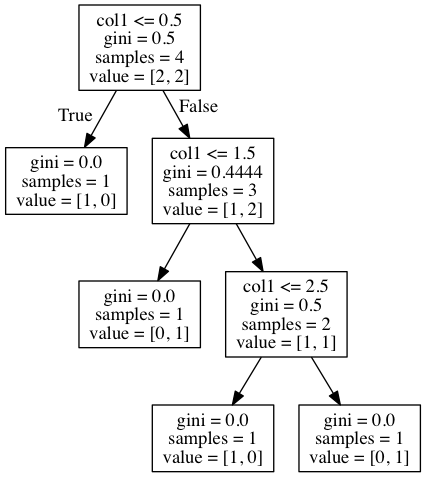

In [16]:
from sklearn.externals.six import StringIO  
import pydot 
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data, feature_names=df.columns)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
# graph[0]
Image(graph[0].create_png()) 


In [4]:
def get_lineage(tree, feature_names):
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]

     # get ids of child nodes
    idx = np.argwhere(left == -1)[:,0]     

    def recurse(left, right, child, lineage=None):          
        if lineage is None:
            lineage = [child]
        if child in left:
            parent = np.where(left == child)[0].item()
            split = 'l'
        else:
            parent = np.where(right == child)[0].item()
            split = 'r'

        lineage.append((parent, split, threshold[parent], features[parent]))

        if parent == 0:
            lineage.reverse()
            return lineage
        else:
            return recurse(left, right, parent, lineage)

    for child in idx:
        for node in recurse(left, right, child):
            print node

In [5]:
get_lineage(dt, df.columns)

(0, 'l', 3.5, 'col2')
1
(0, 'r', 3.5, 'col2')
(2, 'l', 1.5, 'col1')
3
(0, 'r', 3.5, 'col2')
(2, 'r', 1.5, 'col1')
(4, 'l', 2.5, 'col1')
5
(0, 'r', 3.5, 'col2')
(2, 'r', 1.5, 'col1')
(4, 'r', 2.5, 'col1')
6
